In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = os.path.join("data","mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data", "clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
complete_data = pd.merge(trial_data_df,mouse_data_df, left_on = "Mouse ID", right_on = "Mouse ID", how = "outer")

# Display the data table for preview
complete_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


In [2]:
#columns to drop to condense data
columns_dropped = ["Ceftamin", "Naftisol", "Propriva", "Stelasyn", "Zoniferol"]


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = complete_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tumor_response_df = tumor_response.to_frame().reset_index()
# Preview DataFrame
tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stand_err_tumor = complete_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
stand_err_tumor_df = stand_err_tumor.to_frame().reset_index()
# Preview DataFrame
stand_err_tumor_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
y_err_tumor = stand_err_tumor_df.pivot(index= "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
y_err_tumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_reformat = tumor_response_df.pivot(index= "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)" )
# Preview that Reformatting worked
tumor_response_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
condensed_drug_df = tumor_response_reformat.drop(columns = columns_dropped)
condensed_y_err_tumor = y_err_tumor.drop(columns = columns_dropped)

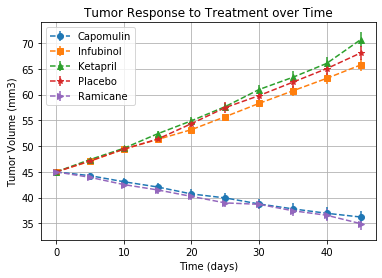

In [8]:
# Generate the Plot (with Error Bars)
count = 0
markers = ["o--","s--","^--","*--", ">--"]

for column in condensed_drug_df.columns:
    plt.errorbar(condensed_drug_df.index,
                 condensed_drug_df[column].values,
                 condensed_y_err_tumor[column],
                 label=column,
                 fmt = markers[count])
    count+=1
plt.legend()


#tumor_response_reformat.plot(kind="scatter")
plt.title("Tumor Response to Treatment over Time")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig("Tumor_Response.png")

plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_response = complete_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
met_response_df = met_response.to_frame().reset_index()
# Preview DataFrame
met_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stand_err_met = complete_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
stand_err_met_df = stand_err_met.to_frame().reset_index()
# Preview DataFrame
stand_err_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
y_err_met = stand_err_met_df.pivot(index= "Timepoint", columns = "Drug", values = "Metastatic Sites")
y_err_met

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [12]:
# Minor Data Munging to Re-Format the Data Frames
met_response_reformat = met_response_df.pivot(index= "Timepoint", columns = "Drug", values = "Metastatic Sites" )
# Preview that Reformatting worked
met_response_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [13]:
condensed_met_df = met_response_reformat.drop(columns = columns_dropped)
condensed_y_err_met = y_err_met.drop(columns = columns_dropped)

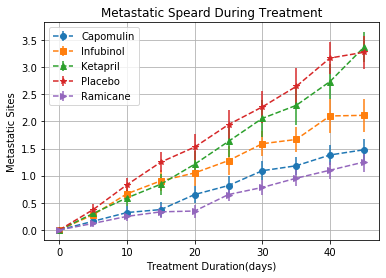

In [14]:
# Generate the Plot (with Error Bars)
count = 0
markers = ["o--","s--","^--","*--",">--"]

for column in condensed_met_df.columns:
    plt.errorbar(condensed_met_df.index,
                 condensed_met_df[column].values,
                 condensed_y_err_met[column],
                 label=column,
                 fmt = markers[count])
    count+=1
plt.legend()

plt.title("Metastatic Speard During Treatment")
plt.xlabel("Treatment Duration(days)")
plt.ylabel("Metastatic Sites")
plt.grid()


# Save the Figure
plt.savefig("Metastatic_Response.png")
# Show the Figure
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate = complete_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
survival_rate_df = survival_rate.to_frame().reset_index().rename(columns = {"Mouse ID": "Mouse Count"})
# Preview DataFrame
survival_rate_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_reformat = survival_rate_df.pivot(index= "Timepoint", columns = "Drug", values = "Mouse Count")
# Preview the Data Frame
survival_rate_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [17]:
survival_rate_percent = survival_rate_reformat.div(survival_rate_reformat.iloc[0])*100
survival_rate_percent

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


In [18]:
condensed_survival_rate = survival_rate_percent.drop(columns = columns_dropped)

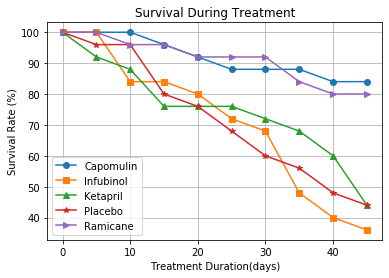

In [19]:
# Generate the Plot (Accounting for percentages)
count = 0
markers = ["o","s","^","*",">"]

for column in condensed_survival_rate.columns:
    plt.plot(condensed_survival_rate.index,
                 condensed_survival_rate[column].values,
                 label=column,
                 marker = markers[count])
    count+=1
            
    
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration(days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

# Save the Figure
plt.savefig("Survival_Percent.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
percent_change = (tumor_response_reformat.iloc[-1]-tumor_response_reformat.iloc[0])/tumor_response_reformat.iloc[0]*100
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [21]:
condensed_percent_change = percent_change.drop(columns_dropped)

In [22]:
positive = condensed_percent_change > 0

In [23]:
values = tuple(condensed_percent_change)

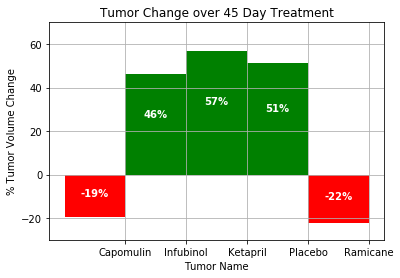

In [24]:
# Splice the data between passing and failing drugs 
summary = plt.bar(condensed_percent_change.index,
                   values,
                   color = positive.map({True: 'g', False: 'r'}),
                   width = -1,
                   align = ("edge"))

# Orient widths. Add labels, tick marks, etc. 
plt.ylim(-30,70)    
xlabels = condensed_percent_change.index
plt.grid()
plt.title("Tumor Change over 45 Day Treatment")
plt.xlabel("Tumor Name")
plt.ylabel("% Tumor Volume Change")

# Use functions to label the percentages of changes
def label_percents(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2,
                 .55*height,
                 str(int(height)) + "%",
                 ha="center",
                 va="bottom",
                 color = "white",
                 fontweight = "bold")

#Call functions to implement the function calls
label_percents(summary)

# Save the Figure
plt.savefig("Tumor_Change.png")

# Show the Figure
plt.show()

## Analysis

Analysis is done by graphs and data from DataFrame.
I am assuming that all the Mice have the same tumor and similar tumor size.




* According to the Tumor Response to Treatment graph, Capomulin was the only drug that decreased the tumor size over the 45 day period. If looking at the DataFrame as well, Ramicane is another drug that decreased the tumor size as well. On the otherhand, most drugs did not have a significant response when comparing the treatment to a placebo given to the mice. Some drugs, such as Ketapril, increased the size of the tumor.   
* When looking at the Metastatic sites during the treatment process, Capomulin and Ramicane again were the best candidates for treatment. Every drug had in increase in Metastatic sites, but mice with treatments in Capomilin and Ramicane spread the least.   These medications help slow the spread of the cancers in the mice. 
* The runner ups for Metastic sites were Infubinol and Stelasyn. If someone look at this data alone, they might think it could be a good option. But when looking at the data alongside the survival rate data, it shows that survival rate of mice with taking this medication drop siginifcantly the longer they take this medication. Accoring the to treatment over time data, these medications also do not decrease the tumor size much.  
* Based on the histogram, Capomulin and Ramicane had the only decrease in treatment with -19% and -22% respectively. Mice taking Ketapril on the other hand increased the tumor size by 57% which is 6% more than mice taking a placebo.   
